# Descripción del Proyecto:
- Predecir la deserción de estudiantes
- Usar como base, el pipeline mostrado para desarrollar un proyecto de Machine Learning.
- Realizar un análisis comparativo de por lo menos 4 clasificadores (pueden ser utilizados modelos de Sci-kit learn u otras librerías de Python). 
- Usar obligatoriamente una implementación propia del algoritmo de regresión logística.
- Hacer análisis comparativo por medio de Cross validation y pruebas de significancia estadística.
- Realizar un proceso de afinamiento sobre el mejor modelo. Reportar sobre el conjunto de prueba con la métrica pertinente
- Enviar un Jupyter Notebook, con todas las etapas del proceso llevado a cabo
*Alumno: Luis Alexis Salazar Marroquin* <br>
*Codigo de Alumno:181-10-42804*

# Obtener los Datos

In [1]:
import pandas as pd
path = "dataset/"

df_students = pd.read_csv(path + "datos_desercion.csv")
df_students.head()

,cant_semestres,sexo,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
0,0,F,9.332000,8.800000,3,0
1,0,F,11.606000,14.600000,1,0
2,0,M,15.052500,11.375000,0,0
3,0,M,9.261666,17.666666,4,0
4,0,M,12.985000,8.666667,2,0


## Vista General

In [2]:
# No hay valores faltantes
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cant_semestres       4500 non-null   int64  
 1   sexo                 4500 non-null   object 
 2   prom_notas_semestre  4500 non-null   float64
 3   prom_inasistencias   4500 non-null   float64
 4   cursos_reprobados    4500 non-null   int64  
 5   desercion            4500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 211.1+ KB


In [3]:
df_students.sexo.unique()

array(['F', 'M'], dtype=object)

In [4]:
df_students.sexo = df_students.sexo.astype(dtype='string')
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cant_semestres       4500 non-null   int64  
 1   sexo                 4500 non-null   string 
 2   prom_notas_semestre  4500 non-null   float64
 3   prom_inasistencias   4500 non-null   float64
 4   cursos_reprobados    4500 non-null   int64  
 5   desercion            4500 non-null   int64  
dtypes: float64(2), int64(3), string(1)
memory usage: 211.1 KB


## Muestra de valores en forma de histograma 

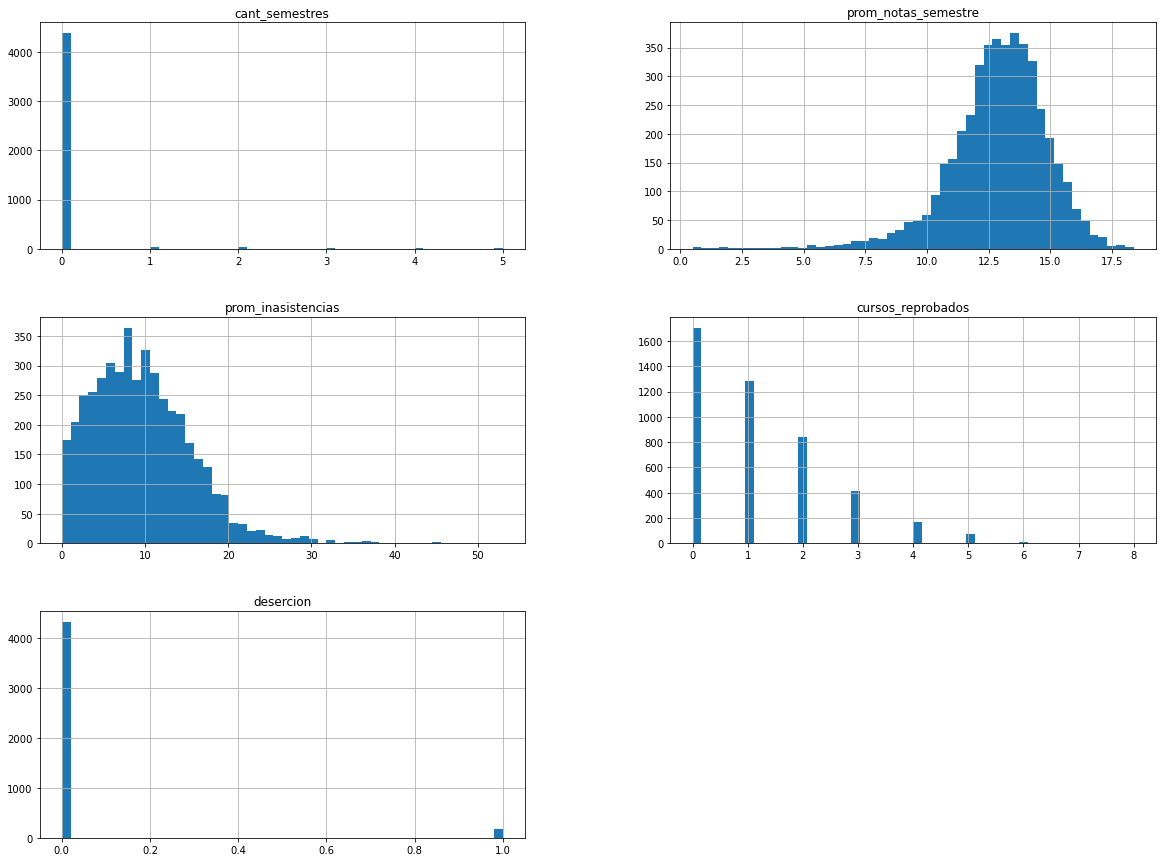

In [5]:
import matplotlib.pyplot as plt
df_students.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
df_students.desercion.value_counts() / len(df_students)

0    0.96
1    0.04
Name: desercion, dtype: float64

## Nota: Hay desproporción en cuanto a la deserción de alumnos y la no deserción que se debe tomar en cuenta, afortunadamente sklearn nos proporciona la división de forma proporcional

# Stratificación de los Datos

## Statificación

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df_students, df_students["desercion"]):
    strat_train_set = df_students.loc[train_index]
    strat_test_set = df_students.loc[test_index]

In [8]:
df_students.desercion.value_counts() / len(df_students)

0    0.96
1    0.04
Name: desercion, dtype: float64

In [9]:
strat_train_set.desercion.value_counts() / len(strat_train_set)

0    0.96
1    0.04
Name: desercion, dtype: float64

In [10]:
strat_test_set.desercion.value_counts() / len(strat_test_set)

0    0.96
1    0.04
Name: desercion, dtype: float64

# Descubrir y visualizar los datos para obtener información

In [11]:
columns = strat_train_set.columns
columns = columns.to_list()
columns

['cant_semestres',
 'sexo',
 'prom_notas_semestre',
 'prom_inasistencias',
 'cursos_reprobados',
 'desercion']

In [12]:
strat_train_set.dtypes

cant_semestres           int64
sexo                    string
prom_notas_semestre    float64
prom_inasistencias     float64
cursos_reprobados        int64
desercion                int64
dtype: object

In [13]:
df_to_display = strat_train_set.copy()

In [14]:
columns.remove("desercion")
columns.remove("sexo")
columns

['cant_semestres',
 'prom_notas_semestre',
 'prom_inasistencias',
 'cursos_reprobados']

In [15]:
df_to_display.dtypes 

cant_semestres           int64
sexo                    string
prom_notas_semestre    float64
prom_inasistencias     float64
cursos_reprobados        int64
desercion                int64
dtype: object

In [16]:
df_temp = df_to_display.drop("sexo",axis=1)
df_temp = df_to_display.drop("desercion",axis=1)

Text(0.5, 0.98, 'Diagrama de Caja')

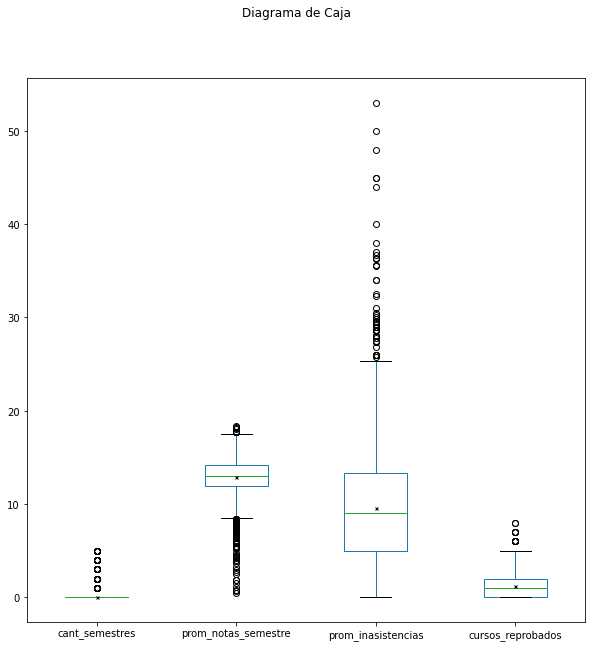

In [17]:

ax = df_temp.boxplot(showmeans=True,column=columns, grid=False,figsize=(10,10),meanprops={"marker": "x", 
                       "markeredgecolor": "black", 
                       "markersize": "3"})
ax.get_figure().suptitle("Diagrama de Caja")

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='cant_semestres', ylabel='prom_notas_semestre'>

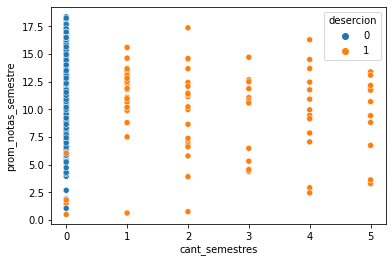

In [19]:
# Intenteo de plot multiples seaborn :(problemas con el etiquetado)
sns.scatterplot(hue=df_to_display.desercion,
                x= df_to_display.cant_semestres ,
                y= df_to_display.prom_notas_semestre)

<AxesSubplot:xlabel='cant_semestres', ylabel='prom_inasistencias'>

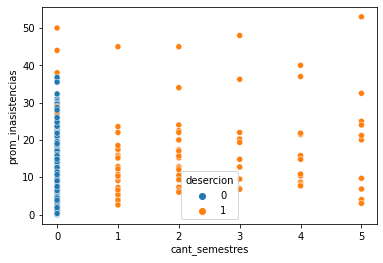

In [20]:
sns.scatterplot(hue=df_to_display.desercion,
                x= df_to_display.cant_semestres ,
                y= df_to_display.prom_inasistencias)

<AxesSubplot:xlabel='cant_semestres', ylabel='cursos_reprobados'>

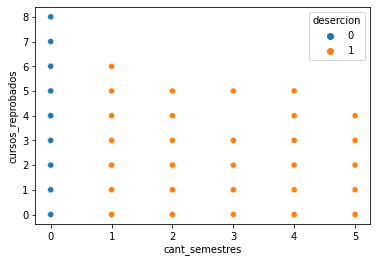

In [21]:
sns.scatterplot(hue=df_to_display.desercion,
                x= df_to_display.cant_semestres ,
                y= df_to_display.cursos_reprobados)

<AxesSubplot:xlabel='prom_notas_semestre', ylabel='prom_inasistencias'>

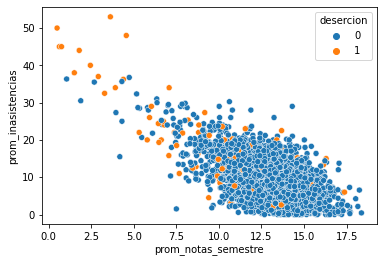

In [22]:
sns.scatterplot(hue=df_to_display.desercion,
                x= df_to_display.prom_notas_semestre ,
                y= df_to_display.prom_inasistencias)

<AxesSubplot:xlabel='prom_notas_semestre', ylabel='cursos_reprobados'>

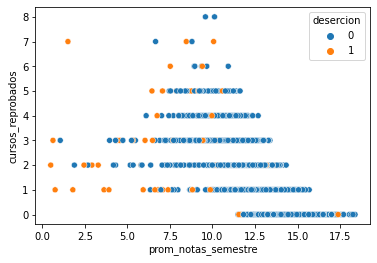

In [23]:
sns.scatterplot(hue=df_to_display.desercion,
                x= df_to_display.prom_notas_semestre ,
                y= df_to_display.cursos_reprobados)

# Correlación de los Datos

In [24]:
df_to_display = strat_train_set.copy()

## Coreelación de todos contra todos

<AxesSubplot:>

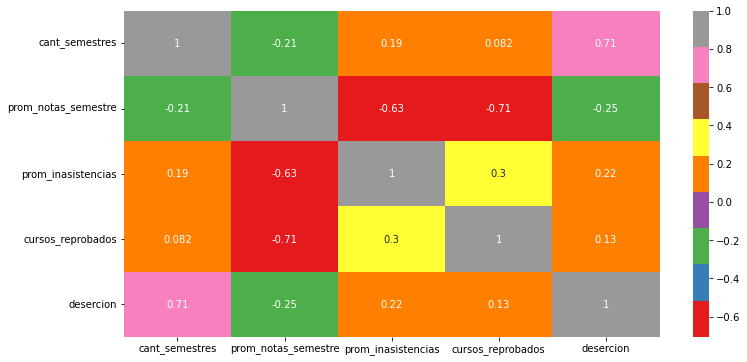

In [25]:
import seaborn as sns
cor = df_to_display.corr(method='pearson')
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

<AxesSubplot:>

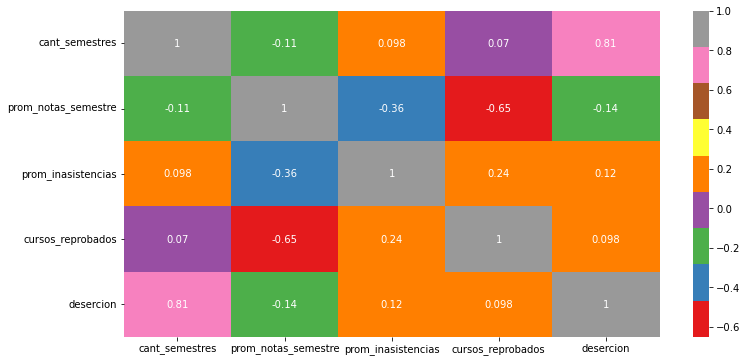

In [26]:
cor = df_to_display.corr(method='kendall')
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

## Corelación del dato deserción

In [27]:
cor = df_to_display.corr(method='pearson')
cor["desercion"].sort_values(ascending=False)

desercion              1.000000
cant_semestres         0.705445
prom_inasistencias     0.223814
cursos_reprobados      0.126333
prom_notas_semestre   -0.253827
Name: desercion, dtype: float64

In [28]:
cor = df_to_display.corr(method='kendall')
cor["desercion"].sort_values(ascending=False)

desercion              1.000000
cant_semestres         0.806630
prom_inasistencias     0.120309
cursos_reprobados      0.097919
prom_notas_semestre   -0.139470
Name: desercion, dtype: float64

## Consideraciones finales de las corelaciones de los datos con respecto a la Deserción
- Las datos que tiene correlación negativa es decir prom_notas_semestre no son dependientes con respecto a deserción
- Los campos de prom_inasistencias,cursos_reprobados tiene una dependencia minima
- El campo completamente relacionado con el campo deserción es cant_semestres

## Corelación de manera visual 

array([[<AxesSubplot:xlabel='cant_semestres', ylabel='cant_semestres'>,
        <AxesSubplot:xlabel='prom_inasistencias', ylabel='cant_semestres'>,
        <AxesSubplot:xlabel='cursos_reprobados', ylabel='cant_semestres'>,
        <AxesSubplot:xlabel='prom_notas_semestre', ylabel='cant_semestres'>,
        <AxesSubplot:xlabel='desercion', ylabel='cant_semestres'>],
       [<AxesSubplot:xlabel='cant_semestres', ylabel='prom_inasistencias'>,
        <AxesSubplot:xlabel='prom_inasistencias', ylabel='prom_inasistencias'>,
        <AxesSubplot:xlabel='cursos_reprobados', ylabel='prom_inasistencias'>,
        <AxesSubplot:xlabel='prom_notas_semestre', ylabel='prom_inasistencias'>,
        <AxesSubplot:xlabel='desercion', ylabel='prom_inasistencias'>],
       [<AxesSubplot:xlabel='cant_semestres', ylabel='cursos_reprobados'>,
        <AxesSubplot:xlabel='prom_inasistencias', ylabel='cursos_reprobados'>,
        <AxesSubplot:xlabel='cursos_reprobados', ylabel='cursos_reprobados'>,
        <Axe

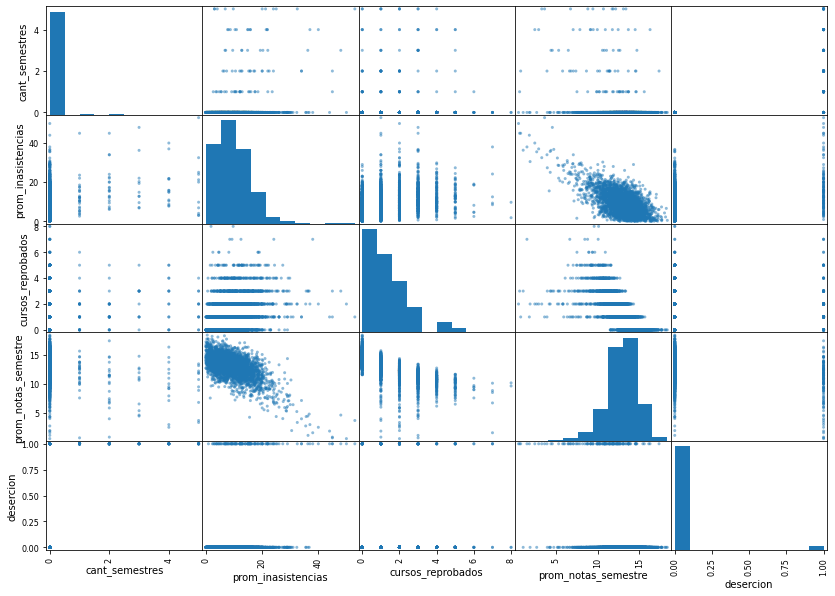

In [29]:
from pandas.plotting import scatter_matrix
attributes=["cant_semestres", "prom_inasistencias", "cursos_reprobados",
             "prom_notas_semestre","desercion"]
scatter_matrix(df_to_display[attributes], figsize=(14, 10))

Existe truncamiento de datos en can_semestres

# Preparación de los datos para algoritmos de machine learning

In [30]:
df_students = strat_train_set.drop("desercion",axis=1)
df_students_labels = strat_train_set["desercion"].copy()

In [31]:
strat_test_set

,cant_semestres,sexo,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
1284,0,M,15.538571,1.285714,1,0
2999,0,F,10.438334,12.500000,4,0
3035,0,M,12.392500,14.875000,4,0
3448,1,F,6.227500,25.500000,3,1
226,0,M,11.967143,9.000000,3,0
...,...,...,...,...,...,...
2208,0,F,12.943750,2.000000,0,0
3315,0,F,14.160000,8.571428,0,0
3080,0,M,14.911428,9.142858,0,0
4494,0,F,15.806666,3.500000,0,0


## Datos Incompleos

In [32]:
df_students.isnull().sum()

cant_semestres         0
sexo                   0
prom_notas_semestre    0
prom_inasistencias     0
cursos_reprobados      0
dtype: int64

No hay datos nulos

In [33]:
# Si hubiera datos Tratar con los datos incompletos
from sklearn.impute import SimpleImputer

## Tratar con datos cateogricos

In [34]:
df_students_cat = df_students["sexo"]
df_students_cat.head()

1477    F
1849    M
4347    F
1994    F
510     M
Name: sexo, dtype: string

In [35]:
df_students_encoded, df_students_categories = df_students_cat.factorize()
df_students_encoded[:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [36]:
df_students_categories

Index(['F', 'M'], dtype='string')

In [37]:
# Solo 2 clases que ya por si es un OneHotEncode si se vuelve binario, si hubiera mas usar la librerias
# https://stackoverflow.com/questions/66510056/one-hot-encoding-a-2-categorical-variable
from sklearn.preprocessing import OneHotEncoder

In [38]:
def transformCat_to_Num(serie_data_cat):
    df_encoded, df_categories = serie_data_cat.factorize()
    serie_data_cat = df_encoded
    return serie_data_cat

## Normalización

In [39]:
from sklearn.preprocessing import StandardScaler
#normalizar
def trasnform_normalize_data(df_data_num):
    scaler = StandardScaler(with_std=True,with_mean=True).fit(df_data_num)
    scaler_data = scaler.transform(df_data_num)
    return pd.DataFrame(scaler_data,columns=df_data_num.columns) 

# Definiendo el Pipeline

In [40]:
def pipeline(df_data,label_cat):
    df_data_num = df_data.drop(label_cat,axis=1)
    serie_data_cat = df_data[label_cat]
    
    serie_data_cat = transformCat_to_Num(serie_data_cat)
    df_data_num = trasnform_normalize_data(df_data_num)
    
    
    df_data_tr = df_data_num.copy()
    df_data_tr[label_cat] = serie_data_cat
    return df_data_tr
    

In [41]:
df_students_prepared = pipeline(df_students,"sexo")
df_students_prepared.head()

,cant_semestres,prom_notas_semestre,prom_inasistencias,cursos_reprobados,sexo
0,-0.143998,-0.319330,0.647856,0.625100,0
1,-0.143998,0.686099,-0.633237,-0.937031,1
2,-0.143998,-0.539393,-0.287730,0.625100,0
3,-0.143998,-0.123459,-1.456242,-0.155965,0
4,-0.143998,0.437384,0.088834,-0.155965,1


# Implementación Propia de Regreseión Logistica

In [42]:
import numpy as np
class class_logistic_Regression:
    params_thetas = np.zeros((6,1))
    def __init__(self, lr =0.01, 
                         i=100):
        self.learning_rate = lr
        self.iterations =  i
        
    def __str__(self):
        return "Own_LogisticRegression"
    
    def preparate_data(self,x_data, y_data):
        x_data = x_data.to_numpy()
        y_data = y_data.to_numpy().reshape(len(y_data),1)
        
        m = len(y_data)
        
        x_data = np.hstack((np.ones((m,1)),x_data))
        return x_data, y_data
    
    def preparate_data_numpy(self,x_data, y_data):
        y_data = y_data.reshape(len(y_data),1)
        m = len(y_data)
        x_data = np.hstack((np.ones((m,1)),x_data))
        return x_data, y_data
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self,X):
        return np.round(self.sigmoid(X.dot(self.params_thetas)))
    
    def compute_cost(self,X, y):
        m = len(y)
        h = self.sigmoid(X.dot(self.params_thetas))

        y = y.T
        cost = (1/m)*((-y).dot(np.log(h))-(1-y).dot(np.log(1-h)))

        return cost
    
    def fit(self,x_data, y_Data):
        m = len(y_Data)
        x_data_pr = np.hstack((np.ones((m,1)),x_data))
        y_Data = y_Data.reshape(m,1)
 
        self.gradient_descent(x_data_pr,y_Data)

    def gradient_descent(self,X, y):
        m = len(y)
        cost_history = np.zeros((self.iterations,1))

        for i in range(self.iterations):
            self.params_thetas = self.params_thetas - (self.learning_rate/m) * (X.T.dot(self.sigmoid(X.dot(self.params_thetas)) - y)) 
            cost_history[i] = self.compute_cost(X, y)

        self.cost_history = cost_history

# Modelos Machine Learning

## Regresión Logística Propia

In [43]:
own_logist_regre = class_logistic_Regression()

## Sklearn Regresión Logística

In [44]:
from sklearn.linear_model import LogisticRegression
losgist_regre_clf=LogisticRegression()

## Sklearn Random Forest Classifier 

In [45]:
from sklearn.ensemble import RandomForestClassifier
rand_forest_clf = RandomForestClassifier()

## SKlearn Support Vector Machine SVM

In [46]:
from sklearn.svm import SVR,LinearSVC
svm_clf = LinearSVC()

## Clasificador Bayesiano

In [47]:
from sklearn.naive_bayes import GaussianNB
gaus_clf = GaussianNB()

## SKlearn SGDClassifier

In [48]:
from sklearn.linear_model import SGDClassifier
sgcd_clf = SGDClassifier()

# Funciones para las metricas en mi propio modelo 

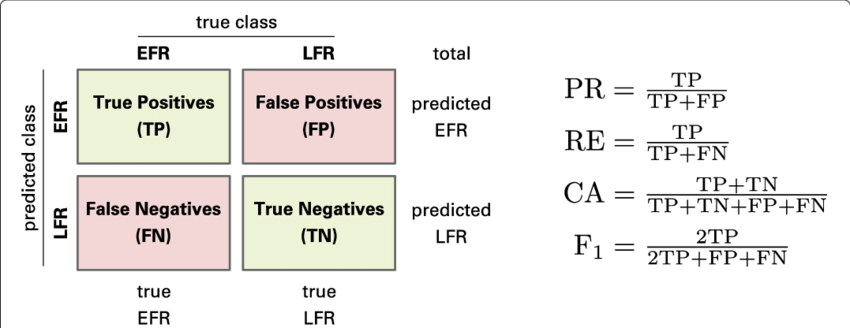

In [49]:
from sklearn.metrics import confusion_matrix
# j:indice de modelo
def func_metric(model,x_data,y_true_data,metrics,historial,j,i):
    x_data, y_true_data= model.preparate_data_numpy(x_data,y_true_data) 
    y_predict = model.predict(x_data)
    matrix_confusion = confusion_matrix(y_true_data,y_predict)

    tp = matrix_confusion[0][0]
    fp = matrix_confusion[0][1]
    fn = matrix_confusion[1][0]
    tn = matrix_confusion[1][1]
    list_metric = []
    for m in metrics:
        if m == "precision_score":
            # historial[i][j][k]=tp/(tp+fp)
            list_metric.append(tp/(tp+fp))
        elif m == "recall_score":
            # historial[i][j][k]=tp/(tp+fn)
            list_metric.append(tp/(tp+fn))
        elif m == "accuracy_score":
            # historial[i][j][k]=(tp+tn)/(tp+tn+fp+fn)
            list_metric.append((tp+tn)/(tp+tn+fp+fn))
        elif m == "f1_score":
            # historial[i][j][k]=(2*tp)/(2*tp+fp+fn)
            list_metric.append((2*tp)/(2*tp+fp+fn))
    # print(list_metric)
    historial[j][i] = list_metric

# Analisis Comprartivo Previo (Validación Cruzada) con Test de significancia estadistica
- Analisis entre varios algoritmos
- Configuración optima para varios algoritmos 

## Definición de la función validación cruzada con test de significancia estadistica

In [50]:
# https://stackoverflow.com/questions/63794740/error-while-implementing-cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.metrics import make_scorer,precision_score,f1_score,accuracy_score, r2_score
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,mean_absolute_error,mean_squared_error,log_loss, confusion_matrix
# documentación de make_scorer: https://scikit-learn.org/stable/modules/model_evaluation.html

# Stratified K Fold Cross Validation
# https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
# https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/
# https://www.rockyourcode.com/write-your-own-cross-validation-function-with-make-scorer-in-scikit-learn/
# best: https://stackoverflow.com/questions/63794740/error-while-implementing-cross-validation

# Cross validation solo para los modelos de sklearn https://www.rockyourcode.com/write-your-own-cross-validation-function-with-make-scorer-in-scikit-learn/

# Metrics: https://towardsdatascience.com/cross-validation-430d9a5fee22
# Modelos de Skelearn https://stackoverflow.com/questions/13701603/how-to-duplicate-an-estimator-in-order-to-use-it-on-multiple-data-sets

In [51]:
def stratified_k_fold_cross_vald(models, metrics ,x_train, y_train, n_folds=5,flag_same_model = False):
    # Modelo, Fold , Lista con el score de las metricas     
    historial_clas_metrics = np.zeros((len(models),n_folds,len(metrics)))
    skfolds = StratifiedKFold(n_splits = n_folds)
    i = 0 #Indice del Fold
    for train_index, test_index in  skfolds.split(x_train, y_train):
        x_train_folds,y_train_folds = x_train.values[train_index], y_train.values[train_index]
        x_test_fold , y_test_fold = x_train.values[test_index], y_train.values[test_index]
        for j,model in enumerate(models):

            if (type(model) == class_logistic_Regression):
                clone_clf = class_logistic_Regression(model.learning_rate,model.iterations)
                clone_clf.fit(x_train_folds,y_train_folds)
                func_metric(clone_clf,x_test_fold,y_test_fold,metrics,historial_clas_metrics,j,i)
   
            else: #Modelos de sklearn
            
                clone_clf = clone(model)
                
                clone_clf.fit(x_train_folds,y_train_folds)
                y_pred = clone_clf.predict(x_test_fold)
                
                list_metric = []
                for m in metrics:
                    if m == "precision_score":
                        list_metric.append(precision_score(y_test_fold , y_pred))
                    elif m == "recall_score":
                        list_metric.append(recall_score(y_test_fold , y_pred))
                    elif m == "accuracy_score":
                        list_metric.append(accuracy_score(y_test_fold , y_pred))
                    elif m == "f1_score":
                        list_metric.append(f1_score(y_test_fold , y_pred))
                #Guardar los valores de las metricas calculadas
                historial_clas_metrics[j][i] = list_metric
        i+=1 #Pasar al siguiente fold
    #-----AVERAGE de cada metrica por modelo x fold----
    resume = []
    for model in historial_clas_metrics:
        temp = []
        for fold in model.T:
            temp.append(np.average(fold))
            # print(np.average(fold))
        resume.append(temp)
    # return np.array(resume)
    # ---------SetEstadistica con los modelos---------
    if flag_same_model:
        for i in range(len(models)):
            models[i] = str(models[i])+"_p_"+str(i+1)
    else:
        for i in range(len(models)):
            models[i] = str(models[i])
    return dict(zip(models, resume )), np.array(resume)

## Ejecución del test estadistico

In [52]:
list_cla = [own_logist_regre, losgist_regre_clf, rand_forest_clf,gaus_clf,sgcd_clf,svm_clf] 
# own_logist_regre, losgist_regre_clf,rand_forest_clf,  svm_clf gaus_clf

labels_metrics = ["precision_score","recall_score","accuracy_score","f1_score"]
#accuracy_score,precision_score, recall_score,f1_score

In [53]:
history_statistical_test,resume = stratified_k_fold_cross_vald(list_cla, labels_metrics ,df_students_prepared
                                                               , df_students_labels,n_folds = 5)

E:\anaconda3\envs\ia_pract_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\envs\ia_pract_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\envs\ia_pract_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\envs\ia_pract_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\envs\ia_pract_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
print("Metricas -> ",labels_metrics,"\n\n")
for key,value in history_statistical_test.items():
    print("Modelo:",key," : ", value)

Metricas ->  ['precision_score', 'recall_score', 'accuracy_score', 'f1_score'] 


Modelo: Own_LogisticRegression  :  [1.0, 0.9761200046491627, 0.9765079365079364, 0.9879143354239359]
Modelo: LogisticRegression()  :  [0.9888888888888889, 0.6824615384615385, 0.9869841269841271, 0.8064079331521192]
Modelo: RandomForestClassifier()  :  [0.9463118580765638, 0.6741538461538461, 0.9853968253968255, 0.7851029579341005]
Modelo: GaussianNB()  :  [0.94734126984127, 0.6901538461538461, 0.986031746031746, 0.7969767767515804]
Modelo: SGDClassifier()  :  [1.0, 0.6664615384615384, 0.9866666666666667, 0.7982683982683982]
Modelo: LinearSVC()  :  [1.0, 0.6664615384615384, 0.9866666666666667, 0.7982683982683982]


In [55]:
resume

array([[1.        , 0.97612   , 0.97650794, 0.98791434],
       [0.98888889, 0.68246154, 0.98698413, 0.80640793],
       [0.94631186, 0.67415385, 0.98539683, 0.78510296],
       [0.94734127, 0.69015385, 0.98603175, 0.79697678],
       [1.        , 0.66646154, 0.98666667, 0.7982684 ],
       [1.        , 0.66646154, 0.98666667, 0.7982684 ]])

In [56]:
import operator
print("Ordenar de Mayor a Menor por clasificador por cada metrica","\n\n")
model_label = list_cla.copy()
for i in range(len(list_cla)):
        list_cla[i] = str(list_cla[i])

labels_model = []
value_metrics = []
for i,r in enumerate(resume.T):
    temp_dict = dict(zip(model_label,r))
    
    # sort_key = temp_dict.items() 
    new_items = sorted(temp_dict.items(),key=operator.itemgetter(1),reverse=True) 
    # new_items = {k: v for k, v in sorted(temp_dict.items(), key=lambda item: item[1])} #Orden menor a mayor
    
    temp_lm = []
    temp_vm = []
    for n in new_items:
        temp_lm.append(n[0])
        temp_vm.append(n[1])
    labels_model.append(temp_lm)
    value_metrics.append(temp_vm)
    
    print(labels_metrics[i]," : ",new_items,"\n\n")


Ordenar de Mayor a Menor por clasificador por cada metrica 


precision_score  :  [('Own_LogisticRegression', 1.0), ('SGDClassifier()', 1.0), ('LinearSVC()', 1.0), ('LogisticRegression()', 0.9888888888888889), ('GaussianNB()', 0.94734126984127), ('RandomForestClassifier()', 0.9463118580765638)] 


recall_score  :  [('Own_LogisticRegression', 0.9761200046491627), ('GaussianNB()', 0.6901538461538461), ('LogisticRegression()', 0.6824615384615385), ('RandomForestClassifier()', 0.6741538461538461), ('SGDClassifier()', 0.6664615384615384), ('LinearSVC()', 0.6664615384615384)] 


accuracy_score  :  [('LogisticRegression()', 0.9869841269841271), ('SGDClassifier()', 0.9866666666666667), ('LinearSVC()', 0.9866666666666667), ('GaussianNB()', 0.986031746031746), ('RandomForestClassifier()', 0.9853968253968255), ('Own_LogisticRegression', 0.9765079365079364)] 


f1_score  :  [('Own_LogisticRegression', 0.9879143354239359), ('LogisticRegression()', 0.8064079331521192), ('SGDClassifier()', 0.79826839

## Graficos de Test Estadistico

In [57]:
colors_to_bars = [["#e74c3c","#f1948a","#f5b7b1","#fadbd8","#fdedec","#ec7063"],
                  ["#884ea0","#9b59b6","#af7ac5","#c39bd3","#d7bde2","#ebdef0"],
                  ["#D68910","#F39C12","#F5B041","#F8C471","#FAD7A0","#FDEBD0"],
                  ["#2471a3","#2980b9","#5499c7","#7fb3d5","#a9cce3","#d4e6f1"]]

In [58]:
import pandas as pd
from matplotlib import pyplot as plt

def plot_bar_model(x_data,y_data,title,colors,minValue):
  
    # model = df_to_bars['Modelo']
    # value_m = df_to_bars['Valor Metrica']

    # Figure Size
    fig, ax = plt.subplots(figsize =(10, 10))
    

    # Horizontal Bar Plot
    ax.barh(y_data, x_data,color=colors)


    # Remove x, y Ticks
    # ax.xaxis.set_ticks_position(np.arange(0.5,1, 0.1))
    # ax.yaxis.set_ticks_position('none')
    
    # plt.xticks(np.arange(0, 1, step))
    # plt.yticks(np.arange(0, max(y), 2))
    
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    
    # plt.xlim(0.90,1.0001)
    plt.xlim(minValue-0.05,1.0001)
    
    # Add x, y gridlines
    ax.grid(visible = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    for i in ax.patches:
        plt.text(1.005, i.get_y()+0.5,
                 str(round((i.get_width()), 4)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    ax.set_title(title)

   
    # Show Plot
    plt.show()

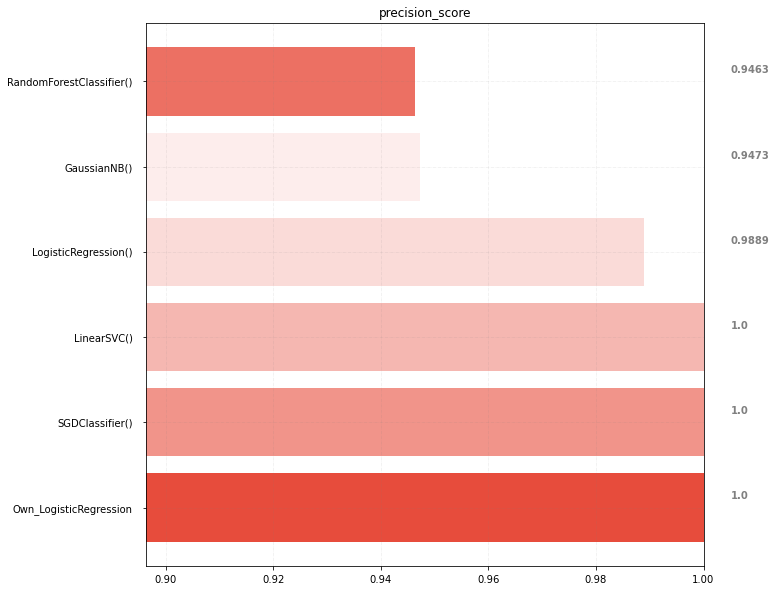

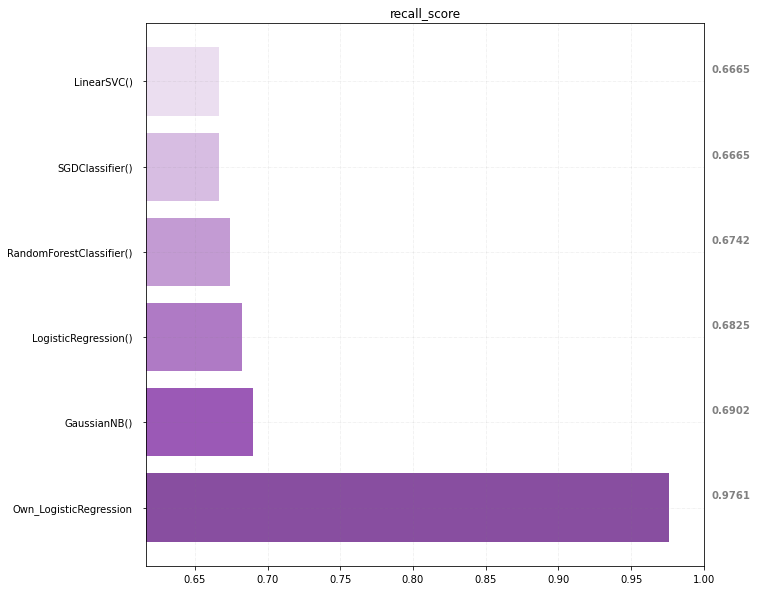

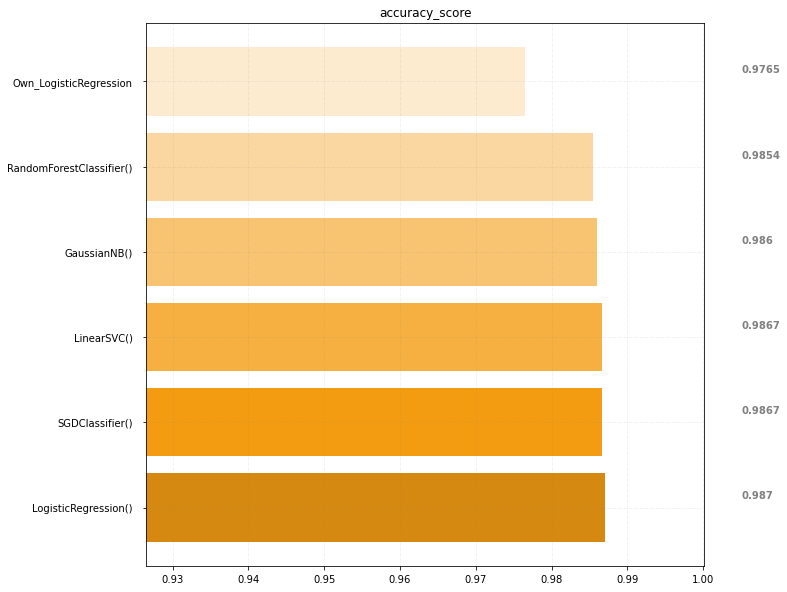

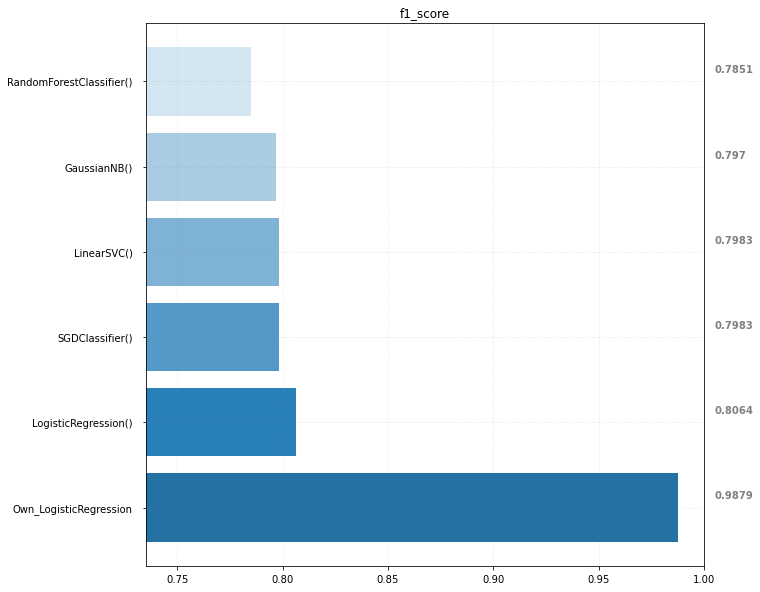

In [59]:
for i in range(len(labels_metrics)):
    df_to_bars = pd.DataFrame({
        "Modelo": labels_model[i],
        "Valor Metrica": value_metrics[i]
    })
    
    minValue = df_to_bars["Valor Metrica"].min()
    plot_bar_model(df_to_bars["Valor Metrica"],df_to_bars["Modelo"],labels_metrics[i],colors_to_bars[i], minValue)

## Conclusión de Test estadisticas
- El mejor modelo que gano en todas las metricas es la propia implementación ganado en 3 metricas excepto en accuracy_score
- El segundo modelo que se le acerco es el modelo sklearn LogisticRegression

# Afinamiento de Modelo ganador (Regresión Logistica Propia)
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://programmerclick.com/article/37861127741/
<br>
Debido a que mi modelo no es una clase de sklearn utilzaremos el propio test estadistico con un solo modelo

In [60]:
list_own_logis_regression = []
labels_metrics = ["precision_score","recall_score","accuracy_score","f1_score"]
# taza de aprendisaje y iteraciones
dict_param = {
        1:(0.01,10),
        2:(0.02,20),
        3:(0.03,30),
        4:(0.01,20),
        5:(0.02,30),
        6:(0.03,40),
        4:(0.01,200),
        5:(0.02,200),
        6:(0.03,200),
        7:(0.01,300),
        8:(0.02,300),
        9:(0.03,300),
        10:(0.05,500),
        }

In [61]:
for i in range(len(dict_param)):
    list_own_logis_regression.append(class_logistic_Regression(dict_param[i+1][0],dict_param[i+1][1]))

In [62]:
history_statistical_own_model,resume_own_model = stratified_k_fold_cross_vald(list_own_logis_regression, labels_metrics ,df_students_prepared, df_students_labels,n_folds = 5,flag_same_model=True)

In [63]:
import operator
print("Ordenar de Mayor a Menor por clasificador por cada metrica","\n\n")
model_label = list_own_logis_regression.copy()
for i in range(len(list_cla)):
        list_cla[i] = str(list_cla[i]+"_p_"+str(i+1))

labels_model = []
value_metrics = []      
for i,r in enumerate(resume_own_model.T):
    temp_dict = dict(zip(model_label,r))
    
    # sort_key = temp_dict.items() 
    new_items = sorted(temp_dict.items(),key=operator.itemgetter(1),reverse=True) 
    
    temp_lm = []
    temp_vm = []
    j = 0
    for n in new_items:
        if j==6:
            break
        temp_lm.append(n[0])
        temp_vm.append(n[1])
        j+=1
    labels_model.append(temp_lm)
    value_metrics.append(temp_vm)
    
    print(labels_metrics[i]," : ",new_items,"\n\n")

Ordenar de Mayor a Menor por clasificador por cada metrica 


precision_score  :  [('Own_LogisticRegression_p_1', 1.0), ('Own_LogisticRegression_p_2', 1.0), ('Own_LogisticRegression_p_3', 1.0), ('Own_LogisticRegression_p_4', 1.0), ('Own_LogisticRegression_p_5', 1.0), ('Own_LogisticRegression_p_6', 1.0), ('Own_LogisticRegression_p_7', 1.0), ('Own_LogisticRegression_p_8', 1.0), ('Own_LogisticRegression_p_9', 1.0), ('Own_LogisticRegression_p_10', 1.0)] 


recall_score  :  [('Own_LogisticRegression_p_10', 0.9792939530877038), ('Own_LogisticRegression_p_9', 0.9777030845215856), ('Own_LogisticRegression_p_6', 0.9773852500060201), ('Own_LogisticRegression_p_8', 0.9773852500060201), ('Own_LogisticRegression_p_5', 0.9773847237899347), ('Own_LogisticRegression_p_7', 0.9770694389913522), ('Own_LogisticRegression_p_1', 0.9764342740377658), ('Own_LogisticRegression_p_2', 0.9764342740377658), ('Own_LogisticRegression_p_3', 0.9761200046491627), ('Own_LogisticRegression_p_4', 0.9761200046491627)] 


a

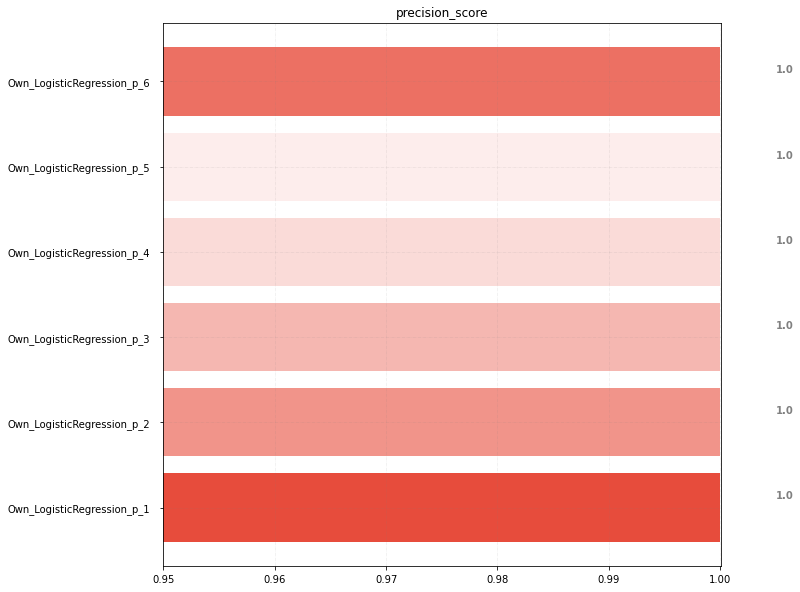

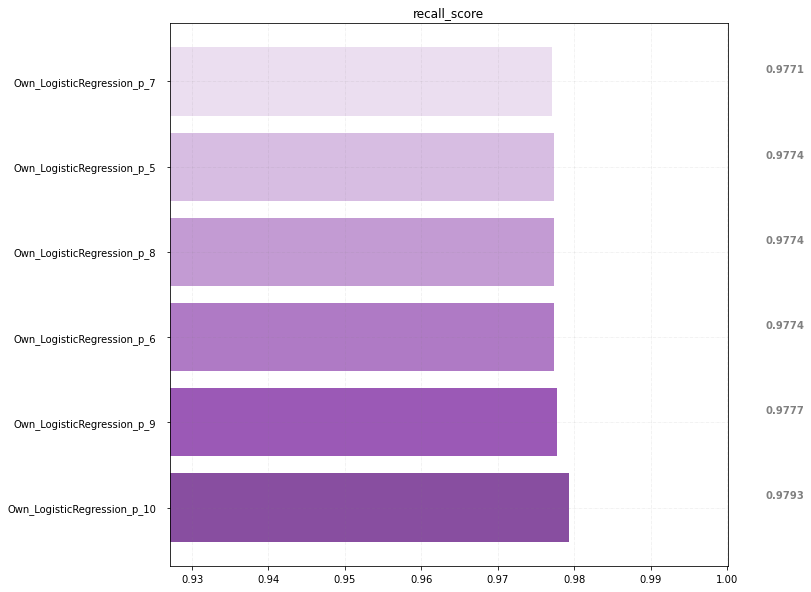

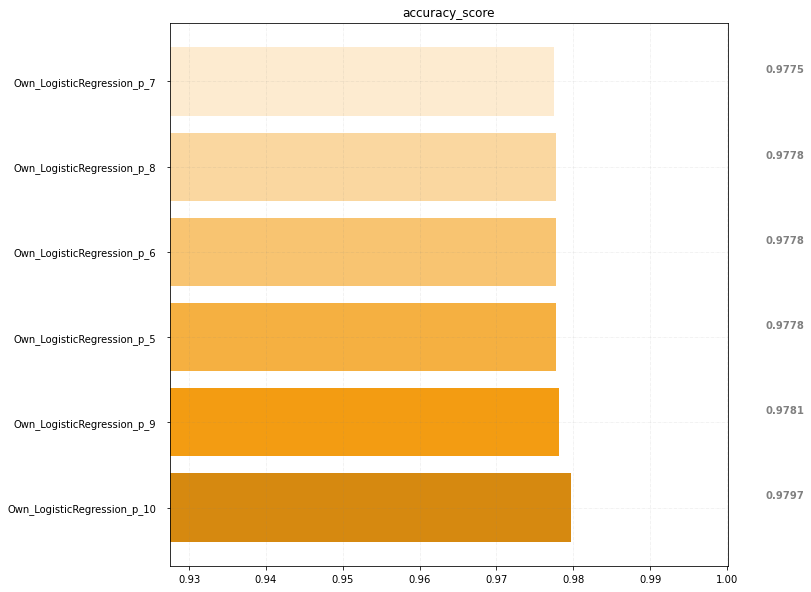

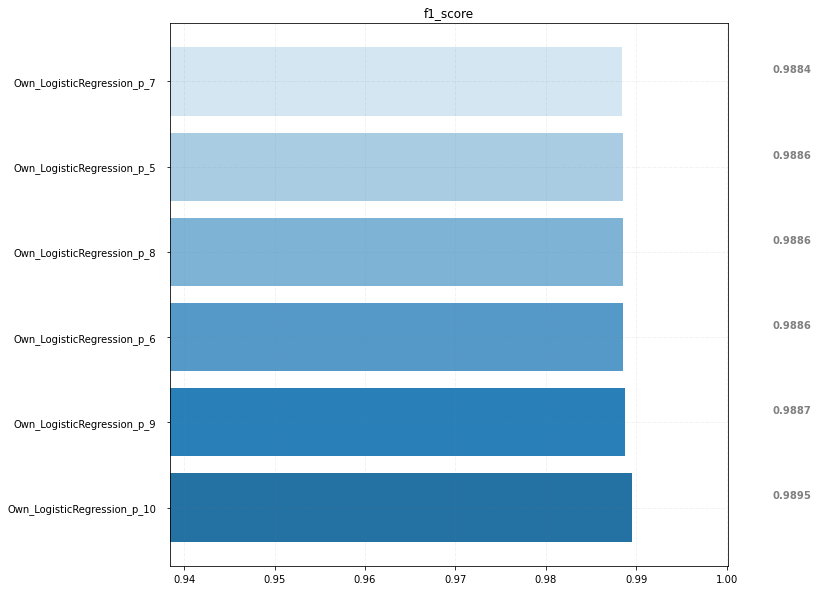

In [64]:
for i in range(len(labels_metrics)):
    df_to_bars = pd.DataFrame({
        "Modelo": labels_model[i],
        "Valor Metrica": value_metrics[i]
    })
    minValue = df_to_bars["Valor Metrica"].min()
    plot_bar_model(df_to_bars["Valor Metrica"],df_to_bars["Modelo"],labels_metrics[i],colors_to_bars[i],minValue)

## Conclusión del proceso de afinamiento
- El ganador es parametro 10 (lr = 0.05 , i = 500)
- A pesar de tener el taza de aprendisaje mas grande que los demas parametros la largas iteraciones consigue mejorar el modelo

# Medición Final

In [65]:
own_logist_regre = class_logistic_Regression(lr= 0.05,i= 500)

In [66]:
df_students_prepared = pipeline(df_students,"sexo")
df_students_labels = df_students_labels.to_numpy()

In [67]:
own_logist_regre.fit(df_students_prepared,df_students_labels)

In [68]:
df_students = strat_test_set.drop("desercion",axis=1)
df_students_labels = strat_test_set["desercion"].copy()
df_students_prepared = pipeline(df_students,"sexo")

In [69]:
df_students_prepared, y_temp = own_logist_regre.preparate_data(df_students_prepared,df_students_labels)

In [70]:
y_predicts = own_logist_regre.predict(df_students_prepared)

In [71]:
matrix_confusion = confusion_matrix(df_students_labels,y_predicts)
tp = matrix_confusion[0][0]
fp = matrix_confusion[0][1]
fn = matrix_confusion[1][0]
tn = matrix_confusion[1][1]
list_values = []
list_metric = ["precision_score","recall_score","accuracy_score","f1_score"]
    
list_values.append(tp/(tp+fp))
list_values.append(tp/(tp+fn))
list_values.append((tp+tn)/(tp+tn+fp+fn))
list_values.append((2*tp)/(2*tp+fp+fn))

In [72]:
for m,v in zip(list_metric,list_values):
    print(m," : ", v)

precision_score  :  1.0
recall_score  :  0.9818181818181818
accuracy_score  :  0.9822222222222222
f1_score  :  0.9908256880733946
